# Assessment 1 - Machine Learning
# (Exercise 1 - Regression Task)

**Kaggle Notebook by Val Kyrvey L. Latoja**

**Brief**

The student is tasked to do two (2) exercises that will put their fundamental knowledge of machine learning to the test. The data must have a minimum of 5 features (Columns) with no limitation.

**Goal**

The goal is to complete all tasks and exercises as per the instructions from the [GitHub](https://github.com/usmanahmad11/Experiment-Portfolio/wiki/Machine-Learning-Assignment-1-%E2%80%90-40%25-Instructions) page implemented by the advisor. The student should know the crucial knowledge of machine learning methods and algorithms.

## 1.1 Library/CSV Implementation

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore') # ignore warnings from plots

# Data Selection
data = pd.read_csv("/kaggle/input/social-anxiety-dataset/enhanced_anxiety_dataset.csv", nrows=500)

## 1.2 Data Gathering & Cleaning

In [2]:
data.head(10) # First 10 data rows

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0
5,53,Male,Other,6.4,6.5,235,2,No,No,9,84,14,3,No,Yes,2,Yes,5,4.0
6,20,Male,Artist,7.9,2.5,78,14,Yes,No,8,118,21,5,Yes,No,1,Yes,2,4.0
7,54,Female,Lawyer,6.3,5.5,535,15,No,No,5,113,19,1,No,No,0,No,7,4.0
8,51,Other,Lawyer,6.6,3.1,587,2,No,No,2,81,22,1,Yes,No,2,Yes,8,3.0
9,59,Female,Teacher,5.1,4.8,159,15,Yes,No,5,95,28,5,Yes,Yes,1,Yes,1,4.0


In [3]:
data.tail(10) # Last 10 data rows

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
490,41,Female,Freelancer,7.4,2.1,363,18,No,Yes,8,98,23,2,No,No,4,Yes,1,7.0
491,32,Male,Teacher,7.0,4.8,149,8,Yes,Yes,5,80,25,5,Yes,No,3,No,7,2.0
492,40,Female,Other,7.6,4.2,68,16,No,No,6,68,12,2,Yes,Yes,0,Yes,5,4.0
493,29,Female,Artist,7.1,4.6,245,9,Yes,No,8,75,14,2,No,No,2,No,10,5.0
494,32,Male,Other,4.8,2.1,289,9,Yes,No,5,103,28,2,Yes,Yes,1,No,8,5.0
495,26,Other,Nurse,7.3,4.5,379,4,Yes,No,6,113,15,4,Yes,Yes,2,No,5,3.0
496,52,Female,Musician,5.8,4.2,218,18,No,No,5,90,12,3,No,No,1,Yes,5,4.0
497,21,Other,Scientist,5.3,2.9,548,19,Yes,Yes,5,91,18,2,Yes,No,2,No,10,6.0
498,47,Female,Musician,4.5,1.0,186,3,Yes,Yes,5,113,12,2,Yes,No,3,Yes,7,2.0
499,33,Female,Chef,4.6,2.0,508,14,Yes,Yes,10,110,25,3,Yes,Yes,6,No,3,8.0


In [4]:
data.info() # Gathering info by which types our dataset provides

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                500 non-null    int64  
 1   Gender                             500 non-null    object 
 2   Occupation                         500 non-null    object 
 3   Sleep Hours                        500 non-null    float64
 4   Physical Activity (hrs/week)       500 non-null    float64
 5   Caffeine Intake (mg/day)           500 non-null    int64  
 6   Alcohol Consumption (drinks/week)  500 non-null    int64  
 7   Smoking                            500 non-null    object 
 8   Family History of Anxiety          500 non-null    object 
 9   Stress Level (1-10)                500 non-null    int64  
 10  Heart Rate (bpm)                   500 non-null    int64  
 11  Breathing Rate (breaths/min)       500 non-null    int64  

In [5]:
data.describe() # Shows statistical data such as the average (mean), standard deviation (std), minimum & maximum

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,40.520000,6.553200,2.86560,291.606000,10.194000,5.780000,89.75000,20.782000,3.072000,2.456000,5.18200,3.992000
std,12.783444,1.273756,1.80706,150.049754,5.690442,2.863564,17.92479,5.004054,1.379355,2.166437,2.83283,2.153418
min,18.000000,2.600000,0.00000,5.000000,0.000000,1.000000,60.00000,12.000000,1.000000,0.000000,1.00000,1.000000
25%,30.000000,5.700000,1.50000,171.750000,6.000000,3.000000,74.00000,16.750000,2.000000,1.000000,3.00000,2.000000
50%,40.000000,6.650000,2.60000,277.000000,10.000000,6.000000,90.00000,21.000000,3.000000,2.000000,5.00000,4.000000
75%,52.000000,7.400000,4.10000,395.250000,15.000000,8.000000,106.00000,25.000000,4.000000,4.000000,8.00000,5.000000
max,64.000000,9.400000,7.80000,599.000000,19.000000,10.000000,119.00000,29.000000,5.000000,9.000000,10.00000,10.000000


In [6]:
# Detects nullified data
data.isnull().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

In [7]:
data = data.dropna() # Removes unnecessary data

# Rename Columns

data.rename(columns={'Sleep Hours': 'Sleep_Hours'}, inplace=True)
data.rename(columns={'Physical Activity (hrs/week)': 'Physical_Activity'}, inplace=True)
data.rename(columns={'Caffeine Intake (mg/day)': 'Caffeine_Intake'}, inplace=True)
data.rename(columns={'Alcohol Consumption (drinks/week)': 'Alcohol_Consumption'}, inplace=True)
data.rename(columns={'Family History of Anxiety': 'Family_History'}, inplace=True)
data.rename(columns={'Stress Level (1-10)': 'Stress_Level'}, inplace=True)
data.rename(columns={'Heart Rate (bpm)': 'Heart_Rate'}, inplace=True)
data.rename(columns={'Breathing Rate (breaths/min)': 'Breathing_Rate'}, inplace=True)
data.rename(columns={'Sweating Level (1-5)': 'Sweating_Level'}, inplace=True)
data.rename(columns={'Therapy Sessions (per month)': 'Therapy_Sessions'}, inplace=True)
data.rename(columns={'Recent Major Life Event': 'Recent_Major_Event'}, inplace=True)
data.rename(columns={'Diet Quality (1-10)': 'Diet_Quality'}, inplace=True)
data.rename(columns={'Anxiety Level (1-10)': 'Anxiety_Level'}, inplace=True)

data.isnull().sum()

Age                    0
Gender                 0
Occupation             0
Sleep_Hours            0
Physical_Activity      0
Caffeine_Intake        0
Alcohol_Consumption    0
Smoking                0
Family_History         0
Stress_Level           0
Heart_Rate             0
Breathing_Rate         0
Sweating_Level         0
Dizziness              0
Medication             0
Therapy_Sessions       0
Recent_Major_Event     0
Diet_Quality           0
Anxiety_Level          0
dtype: int64

In [8]:
data.head()

,Age,Gender,Occupation,Sleep_Hours,Physical_Activity,Caffeine_Intake,Alcohol_Consumption,Smoking,Family_History,Stress_Level,Heart_Rate,Breathing_Rate,Sweating_Level,Dizziness,Medication,Therapy_Sessions,Recent_Major_Event,Diet_Quality,Anxiety_Level
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


## 1.3 Raw Data Visualization
Testing with raw data visualization

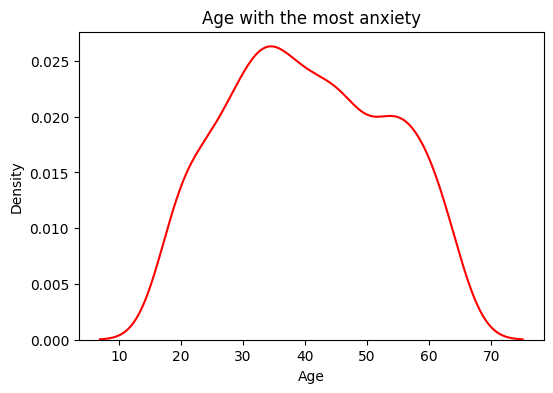

In [9]:
plt.figure(figsize=(6,4))
sns.kdeplot(data['Age'], color= 'r')
plt.title('Age with the most anxiety')
plt.show()

In [10]:
# sort the dataset by global_sales in descending order and select the top 100 rows

top100 = data.sort_values("Anxiety_Level", ascending=False).head(100)

# count the number of games per platform
platform_counts = top100["Age"].value_counts()

print("Ages with the most anxiety:")
print(platform_counts)

Ages with the most anxiety:
Age
33    6
34    6
27    6
38    5
28    5
35    5
45    4
49    4
40    4
44    4
23    3
41    3
22    3
46    3
20    3
43    3
30    3
57    2
52    2
19    2
60    2
32    2
47    2
21    2
31    2
29    2
36    1
37    1
59    1
64    1
26    1
48    1
56    1
61    1
42    1
50    1
58    1
54    1
Name: count, dtype: int64


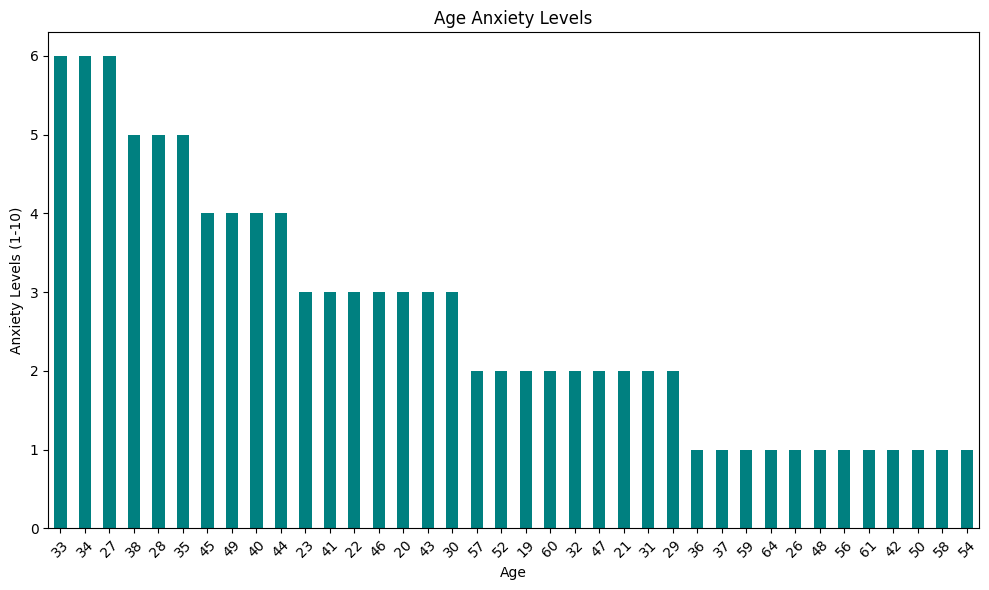

In [11]:
# Plot
plt.figure(figsize=(10, 6))
platform_counts.plot(kind='bar', color='teal')
plt.title("Age Anxiety Levels")
plt.xlabel("Age")
plt.ylabel("Anxiety Levels (1-10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 1.4 Linear Regression Implementation

In [12]:
# Drops any unneccessary features that won't be used inside the model.
data = data.drop(['Gender', 'Occupation', 'Smoking', 'Family_History', 'Dizziness', 'Medication', 'Recent_Major_Event'], axis = 1)
data.head()

,Age,Sleep_Hours,Physical_Activity,Caffeine_Intake,Alcohol_Consumption,Stress_Level,Heart_Rate,Breathing_Rate,Sweating_Level,Therapy_Sessions,Diet_Quality,Anxiety_Level
0,29,6.0,2.7,181,10,10,114,14,4,3,7,5.0
1,46,6.2,5.7,200,8,1,62,23,2,2,8,3.0
2,64,5.0,3.7,117,4,1,91,28,3,1,1,1.0
3,20,5.8,2.8,360,6,4,86,17,3,0,1,2.0
4,49,8.2,2.3,247,4,1,98,19,4,1,3,1.0


In [13]:
# Feature Selection.
x = data[['Sleep_Hours', 'Physical_Activity', 'Caffeine_Intake', 'Alcohol_Consumption',	'Stress_Level', 'Heart_Rate', 'Breathing_Rate',	'Sweating_Level', 'Therapy_Sessions', 'Diet_Quality', 'Anxiety_Level']] # Feature
y = data['Age'] # Target

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size=0.2)

In [15]:
y_test

153    51
258    45
400    33
0      29
221    63
       ..
170    44
488    33
2      64
341    46
45     36
Name: Age, Length: 100, dtype: int64

In [16]:
# Model Training with Linear Regression.
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
# Plot regression line (based on training data)
y_pred = model.predict(x_test)
y_pred

array([42.17226917, 36.57946354, 41.00791623, 38.22436837, 44.69712126,
       44.44248592, 34.60252161, 46.64361142, 42.932172  , 45.80429581,
       39.82987471, 45.42347872, 36.95456776, 43.69177969, 35.37651818,
       43.12119567, 39.46335993, 41.1311935 , 36.73565608, 44.35319104,
       39.49854717, 45.07304271, 37.23720934, 44.18588215, 38.34839692,
       35.63985587, 41.10575954, 38.58890754, 42.21475088, 39.62107959,
       42.11643334, 47.52812259, 41.21689453, 34.5659725 , 44.2964423 ,
       34.19484536, 51.31434042, 36.83078067, 36.9628145 , 39.88278126,
       44.04557442, 36.33294126, 33.05159398, 37.3977216 , 40.88250634,
       34.96882748, 43.26199998, 47.46799609, 46.17854761, 45.50558355,
       38.88970606, 43.6125914 , 39.49860715, 47.32720042, 40.75733547,
       33.01744388, 36.71419848, 40.92835591, 45.61318897, 42.95127893,
       41.59670119, 41.01793135, 35.89618982, 34.70296385, 41.44606275,
       40.72095579, 44.82163538, 34.01113708, 42.7431208 , 43.92

## 1.4 Evaluation

In [18]:
# Finding Mean Absolute Error (MAE), Mean Squared Error (MSE) and R-squared (R²) metrics.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

# NOTE: A lower MAE/MSE/CV and a higher R²/Cross-Validation score indicate a better 
# fit for the data.

Mean Absolute Error (MAE): 9.956057648478776
Mean Squared Error (MSE): 142.16441057512336
R² Score: -0.004971759551730681


## 1.5 Plotting/Algorithmic Data Visualization

In [19]:
# Dividing Columns

Physical_Activity_x_test = x_test["Physical_Activity"]
Sleep_Hours_x_test = x_test["Sleep_Hours"]
Caffeine_Intake_x_test = x_test["Caffeine_Intake"]
Alcohol_Consumption_x_test = x_test["Alcohol_Consumption"]
Stress_Level_x_test = x_test["Stress_Level"]
Heart_Rate_x_test = x_test["Heart_Rate"]
Breathing_Rate_x_test = x_test["Breathing_Rate"]
Sweating_Level_x_test = x_test["Sweating_Level"]
Therapy_Sessions_x_test = x_test["Therapy_Sessions"]
Diet_Quality_x_test = x_test["Diet_Quality"]
Anxiety_Level_x_test = x_test["Anxiety_Level"]

Physical_Activity_x_train = x_train["Physical_Activity"]
Sleep_Hours_x_train = x_train["Sleep_Hours"]
Caffeine_Intake_x_train = x_train["Caffeine_Intake"]
Alcohol_Consumption_x_train = x_train["Alcohol_Consumption"]
Stress_Level_x_train = x_train["Stress_Level"]
Heart_Rate_x_train = x_train["Heart_Rate"]
Breathing_Rate_x_train = x_train["Breathing_Rate"]
Sweating_Level_x_train = x_train["Sweating_Level"]
Therapy_Sessions_x_train = x_train["Therapy_Sessions"]
Diet_Quality_x_train = x_train["Diet_Quality"]
Anxiety_Level_x_train = x_train["Anxiety_Level"]

Text(0, 0.5, 'Anxiety Level (1-10)')

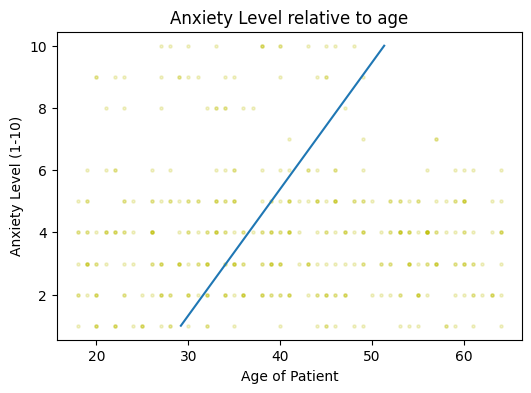

In [20]:
line_x_plot = [min(Anxiety_Level_x_test), max(Anxiety_Level_x_test)]
line_y_plot = [min(y_pred), max(y_pred)]

plt.figure(figsize=(6,4))
plt.scatter(y_train, Anxiety_Level_x_train, color='y', s=5, alpha=0.2)
plt.plot(line_y_plot, line_x_plot)
plt.title('Anxiety Level relative to age')
plt.xlabel("Age of Patient")
plt.ylabel("Anxiety Level (1-10)")

Text(0, 0.5, 'Amount of Physical Activity (hrs/week)')

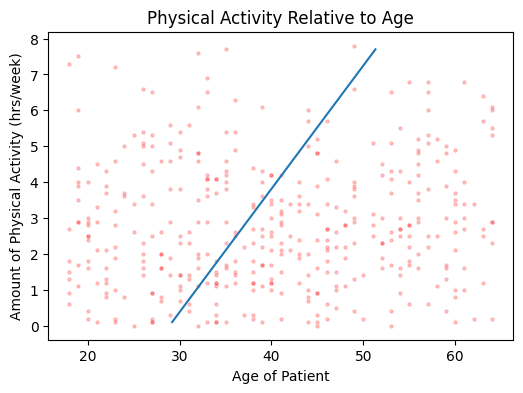

In [21]:
line_x_plot = [min(Physical_Activity_x_test), max(Physical_Activity_x_test)]
line_y_plot = [min(y_pred), max(y_pred)]

plt.figure(figsize=(6,4))
plt.scatter(y_train, Physical_Activity_x_train, color='r', s=5, alpha=0.2)
plt.plot(line_y_plot, line_x_plot)
plt.title('Physical Activity Relative to Age')
plt.xlabel("Age of Patient")
plt.ylabel("Amount of Physical Activity (hrs/week)")


Text(0, 0.5, 'Amount of Sleep (hrs)')

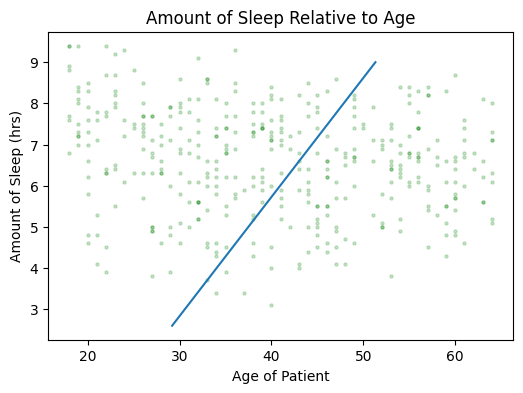

In [22]:
line_x_plot = [min(Sleep_Hours_x_test), max(Sleep_Hours_x_test)]
line_y_plot = [min(y_pred), max(y_pred)]

plt.figure(figsize=(6,4))
plt.scatter(y_train, Sleep_Hours_x_train, color='g', s=5, alpha=0.2)
plt.plot(line_y_plot, line_x_plot)
plt.title('Amount of Sleep Relative to Age')
plt.xlabel("Age of Patient")
plt.ylabel("Amount of Sleep (hrs)")

Text(0, 0.5, 'Caffeine Intake (mg/day)')

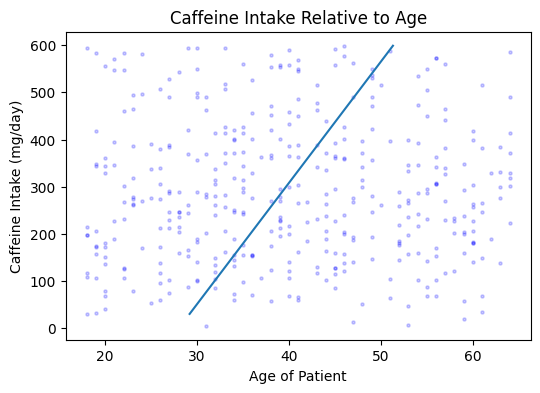

In [23]:
line_x_plot = [min(Caffeine_Intake_x_test), max(Caffeine_Intake_x_test)]
line_y_plot = [min(y_pred), max(y_pred)]

plt.figure(figsize=(6,4))
plt.scatter(y_train, Caffeine_Intake_x_train, color='b', s=5, alpha=0.2)
plt.plot(line_y_plot, line_x_plot)
plt.title('Caffeine Intake Relative to Age')
plt.xlabel("Age of Patient")
plt.ylabel("Caffeine Intake (mg/day)")

Text(0, 0.5, 'Stress Levels (1-10)')

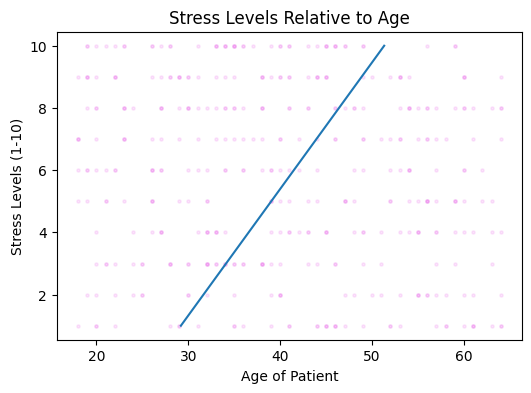

In [24]:
line_x_plot = [min(Stress_Level_x_test), max(Stress_Level_x_test)]
line_y_plot = [min(y_pred), max(y_pred)]

plt.figure(figsize=(6,4))
plt.scatter(y_train, Stress_Level_x_train, color='violet', s=5, alpha=0.2)
plt.plot(line_y_plot, line_x_plot)
plt.title('Stress Levels Relative to Age')
plt.xlabel("Age of Patient")
plt.ylabel("Stress Levels (1-10)")

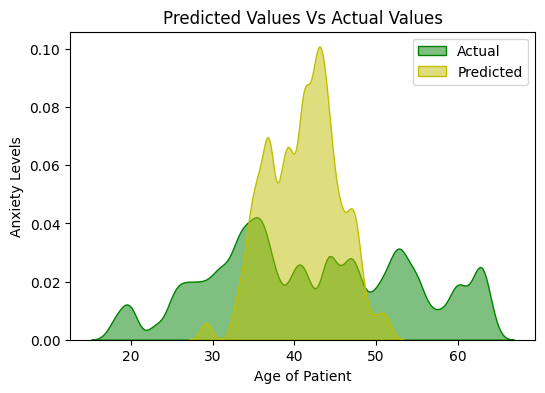

In [25]:
plt.figure(figsize=(6, 4))

sns.kdeplot(y_test, label='Actual', color='g', shade=True, alpha=0.5, bw_adjust=.2)
sns.kdeplot(y_pred, label='Predicted', color='y', shade=True, alpha=0.5, bw_adjust=.4)
plt.xlabel('Age of Patient')
plt.ylabel('Anxiety Levels')
plt.title("Predicted Values Vs Actual Values")

plt.legend()

## 1.6 Summary

This exercise placed my fundamental knowledge to the test. Learning from lectures, forums, and other Kaggle notebooks, getting insight to provide methodologies that best suited my dataset(s). I will explain every section within this notebook, elaborating on the thought process and nuances when programming this exercise.

***Implementation***

I started with the most prevalent libraries that are essential foundations for the basic requirements. Libraries such as pandas to read the .csv file, also known as our dataset; numpy, being the backbone of python libraries, providing one-dimensional arrays and mathematical operations; and expanding more prominent libraries such as MatPlotLib for creating plot tables for data visualizations.To make this exercise more directed to machine learning, I have imported multiple elements from sklearn, colloquially known as scikit-learn, an open-source library that is quintessential when using machine learning-centric coding projects. This gives access to multiple tools integral for the topics we will be diving into next.

***Data Gathering & Cleaning***

Before I get to data cleaning, I want to share the stages I went through to find the most suitable user-friendly dataset. I try to go on in my field of interests, such as music & video games, though the input is not as I desired. Though applicable for the use of logistic regression, the features contain way too many string variables that are not best to be encoded, posing a challenge for this exercise.

So I tried a less ambitious approach, looking for data sets that are feasible around my skill set, meaning that each feature presents enough sets of integers. I have found this social anxiety dataset, which fits these standards, where most topics are based on numerical data.

Now heading to data cleaning, I trim out the data (e.g., NaN) with the use of "data.isnull().sum()"; this detects any unnecessary data, where I can use "data.dropna()" to sweep off said data. I have also renamed the dataset's features for clarity and convenience, benefitting from using these variables for data visualization.

***Linear Regression Implementation***

As per the task, I am instructed to train my datasets to apply linear regression. Linear regression helps to correlate both independent and dependent variables. When both variables are applied, they can calculate predictive data that can be visualized through scatter plots.

To set these variables. I chose 'Age' as the target (x) whilst the features (y) will be traits such as 'Therapy Sessions', 'Caffeine Intake', etc. With this, I separated these variables by letting training data take 80% while testing data took 20%. This ensures that the data calculates of which age shows the most traits linking to anxiety.

***Data Visualization***

Taking reference from other notebooks, I gained knowledge on how to visualize my output. There are two typs of data I visualized: Raw Data & Predictive Data, using Bar & Line Graphs for Raw data whilst Scatter Plots for Predictive Data.

